##Conexión Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#Coloca una cuadricula sobre el cual graficaremos
sns.set() 
import matplotlib.pyplot as plt #Ajustes graficos

##Lectura Base

In [ ]:
df = pd.read_table("/content/drive/MyDrive/Taller_MAEC_INEGI_Bases/Material_MEM/bank2.dat", sep="\s+", #\s+ es para indicar que es un separador con longitud mayor a 1 caracter
                   header=None,names=["X1","X2","X3","X4","X5","X6"])
df

,X1,X2,X3,X4,X5,X6
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7
197,214.8,130.3,130.4,10.6,11.1,140.0
198,214.7,130.7,130.8,11.2,11.2,139.4


In [ ]:
#crear nueva columna 
df['Tipo'] = np.where(df.index<100, 'genuino', 'falsificado')

In [ ]:
df

,X1,X2,X3,X4,X5,X6,Tipo
0,214.8,131.0,131.1,9.0,9.7,141.0,genuino
1,214.6,129.7,129.7,8.1,9.5,141.7,genuino
2,214.8,129.7,129.7,8.7,9.6,142.2,genuino
3,214.8,129.7,129.6,7.5,10.4,142.0,genuino
4,215.0,129.6,129.7,10.4,7.7,141.8,genuino
...,...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6,falsificado
196,215.1,130.3,129.9,10.3,11.5,139.7,falsificado
197,214.8,130.3,130.4,10.6,11.1,140.0,falsificado
198,214.7,130.7,130.8,11.2,11.2,139.4,falsificado


## Gráfico de dispersión

<Figure size 432x288 with 0 Axes>

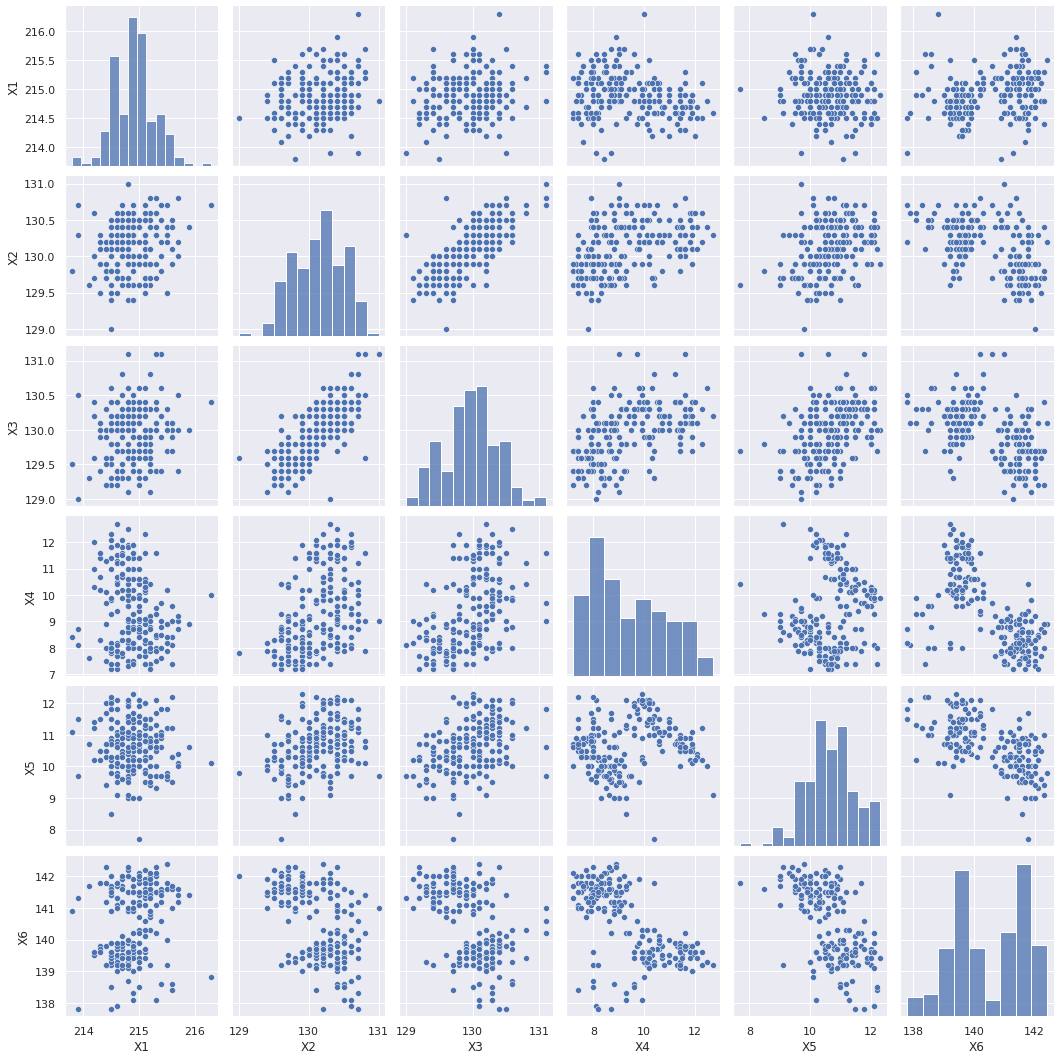

In [ ]:
plt.figure(figsize = (6, 4))
sns.pairplot(df)

<Figure size 432x288 with 0 Axes>

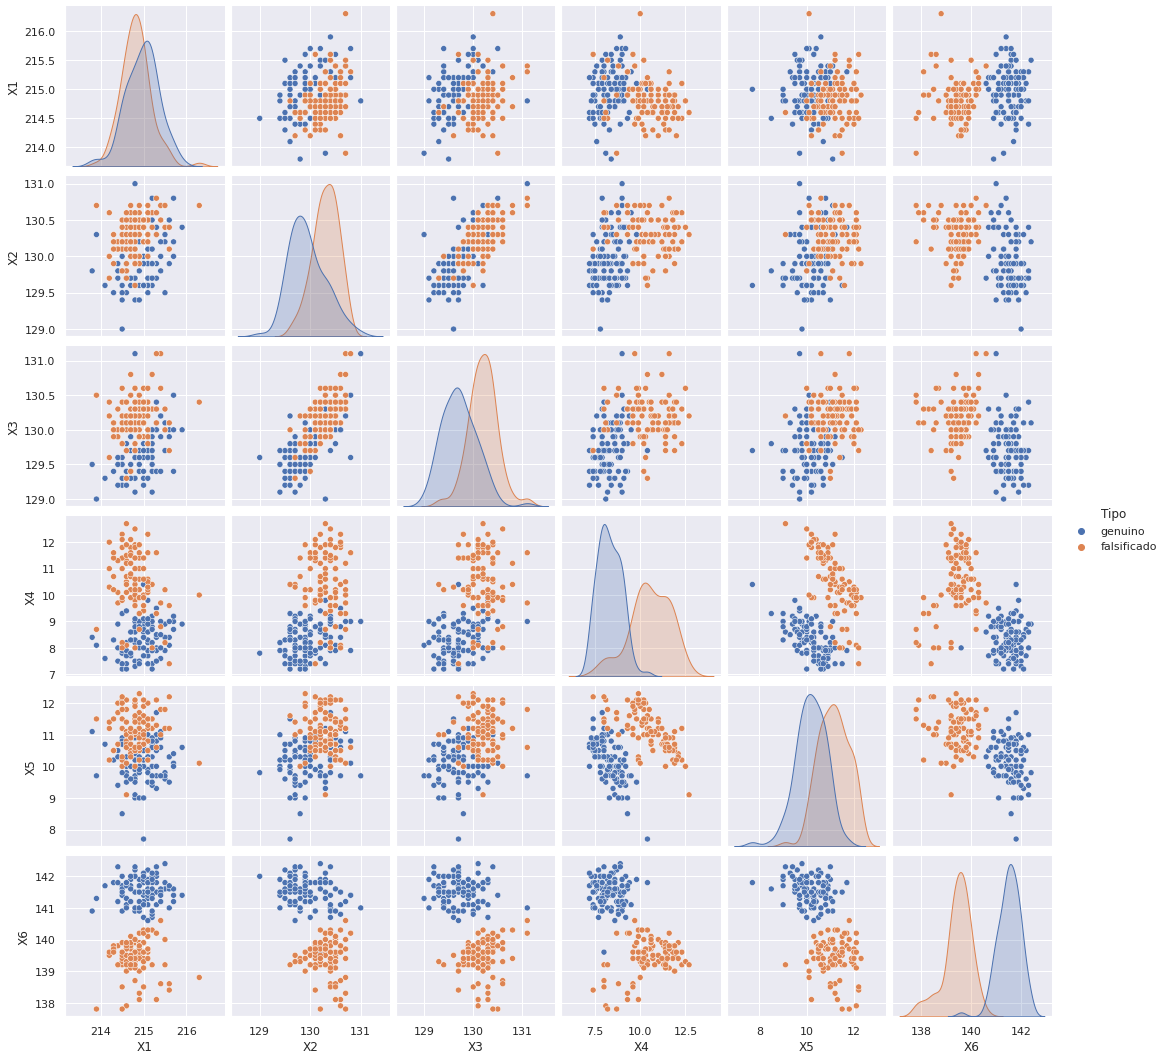

In [ ]:
plt.figure(figsize = (6, 4))
sns.pairplot(df,hue="Tipo")

##Boxplot

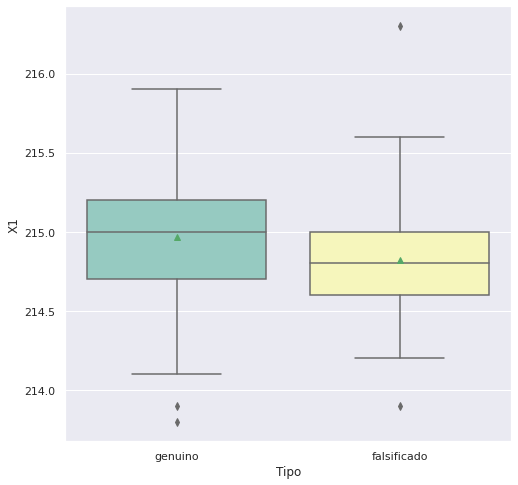

In [ ]:
plt.figure(figsize = (8, 8))
sns.boxplot(x="Tipo", y="X1", data=df, palette="Set3",showmeans=True)

##Violin plot

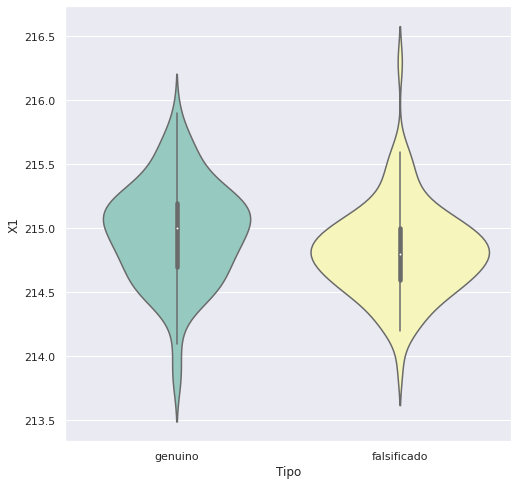

In [ ]:
plt.figure(figsize = (8, 8))
sns.violinplot(x="Tipo", y="X1", data=df,palette="Set3")

##Media y otros estadisticos por grupo

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [ ]:
df[df["Tipo"]=="genuino"]["X6"].mean()#filtra solo genuinos

141.517

In [ ]:
df.groupby('Tipo').mean()

,X1,X2,X3,X4,X5,X6
Tipo,,,,,,
falsificado,214.823,130.300,130.193,10.530,11.133,139.450
genuino,214.969,129.943,129.720,8.305,10.168,141.517


In [ ]:
df.groupby('Tipo').describe().T

Tipo      falsificado     genuino
X1 count   100.000000  100.000000
   mean    214.823000  214.969000
   std       0.352152    0.387610
   min     213.900000  213.800000
   25%     214.600000  214.700000
   50%     214.800000  215.000000
   75%     215.000000  215.200000
   max     216.300000  215.900000
X2 count   100.000000  100.000000
   mean    130.300000  129.943000
   std       0.255050    0.364111
   min     129.600000  129.000000
   25%     130.100000  129.700000
   50%     130.300000  129.900000
   75%     130.500000  130.200000
   max     130.800000  131.000000
X3 count   100.000000  100.000000
   mean    130.193000  129.720000
   std       0.298229    0.355335
   min     129.300000  129.000000
   25%     130.000000  129.400000
   50%     130.200000  129.700000
   75%     130.400000  130.000000
   max     131.100000  131.100000
X4 count   100.000000  100.000000
   mean     10.530000    8.305000
   std       1.131951    0.642812
   min       7.400000    7.200000
   25%       9.900000    7.900000
   50%      10.600000    8.250000
   75%      11.400000    8.800000
   max      12.700000   10.400000
X5 count   100.000000  100.000000
   mean     11.133000   10.168000
   std       0.635968    0.648990
   min       9.100000    7.700000
   25%      10.675000    9.775000
   50%      11.100000   10.200000
   75%      11.525000   10.600000
   max      12.300000   11.700000
X6 count   100.000000  100.000000
   mean    139.450000  141.517000
   std       0.557864    0.447000
   min     137.800000  139.600000
   25%     139.200000  141.200000
   50%     139.500000  141.500000
   75%     139.800000  141.800000
   max     140.600000  142.400000

##Histogramas

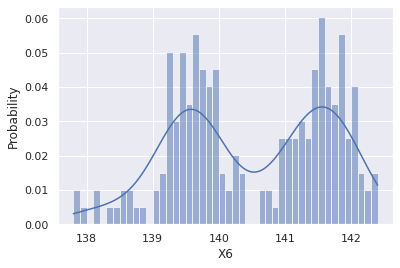

In [ ]:
sns.histplot(data=df, x="X6",kde=True,binwidth=.1,stat="probability")

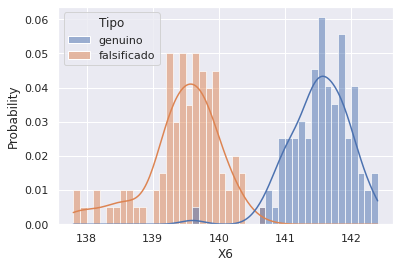

In [ ]:
sns.histplot(data=df, x="X6",hue="Tipo",kde=True,binwidth=.1,stat="probability")

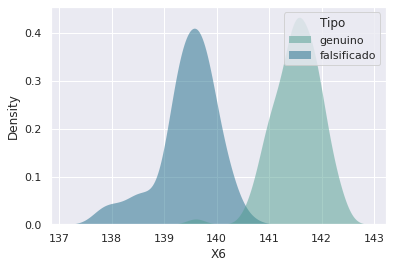

In [ ]:
sns.kdeplot(
   data=df, x="X6", hue="Tipo",
   fill=True, palette="crest"
)

##Densidades bivariadas

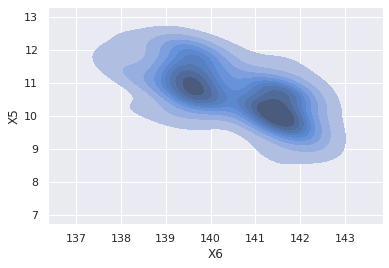

In [ ]:
sns.kdeplot(data=df, x="X6",y="X5", fill=True)

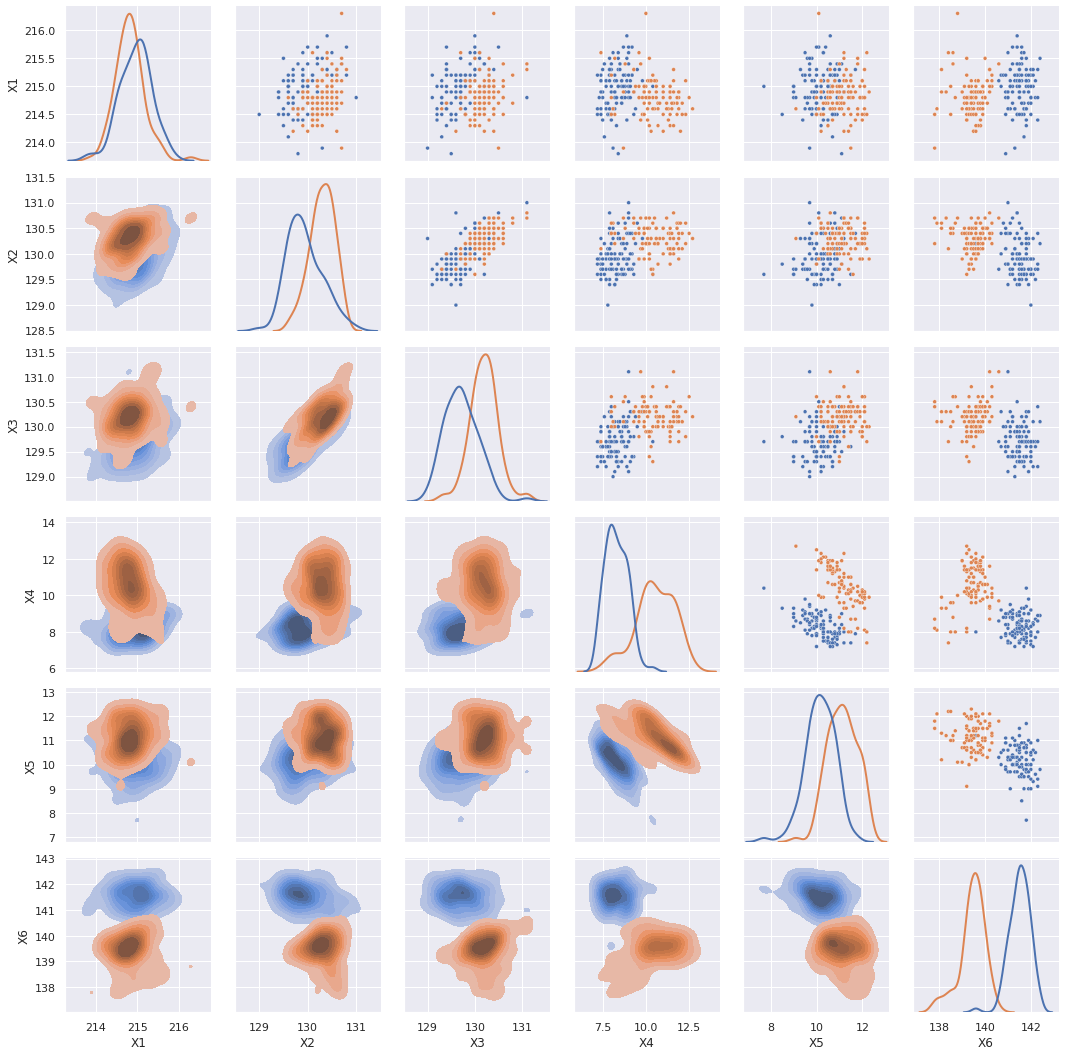

In [ ]:
g = sns.PairGrid(df, hue="Tipo", diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,fill=True)
g.map_diag(sns.kdeplot, lw=2)

## Gráficos de dispersión 

In [ ]:
df=pd.read_table("bank2.dat", sep="\s+", #\s+ es para indicar que es un separador con longitud mayor a 1 caracter
                   header=None,names=["X1","X2","X3","X4","X5","X6"])

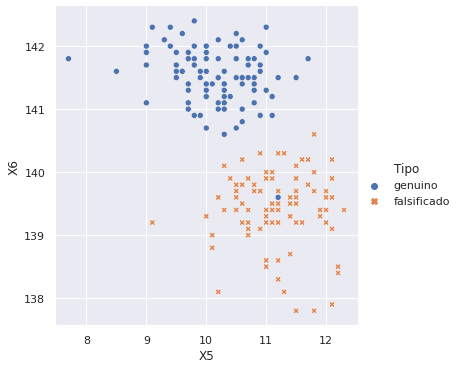

In [ ]:
#Variables 5 y 6
sns.relplot(x='X5',y='X6',data=df,style='Tipo',hue='Tipo')

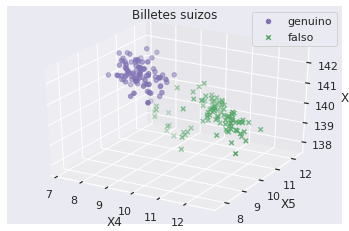

In [ ]:
# Variables 456
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
x = np.array(df['X4'])
y = np.array(df['X5'])
z = np.array(df['X6'])


# Graficamos las dos clases de puntos
ax1.scatter(x[0:100], y[0:100], z[0:100],c='m',marker='o',label='genuino')
ax1.scatter(x[100:200], y[100:200], z[100:200],c='g',marker='x',label='falso')
#
ax1.set_title('Billetes suizos')
ax1.set_xlabel('X4')
ax1.set_ylabel('X5')
ax1.set_zlabel('X6')
ax1.legend()
# Mostramos el gráfico
plt.show()


## Gráficas tipo draft

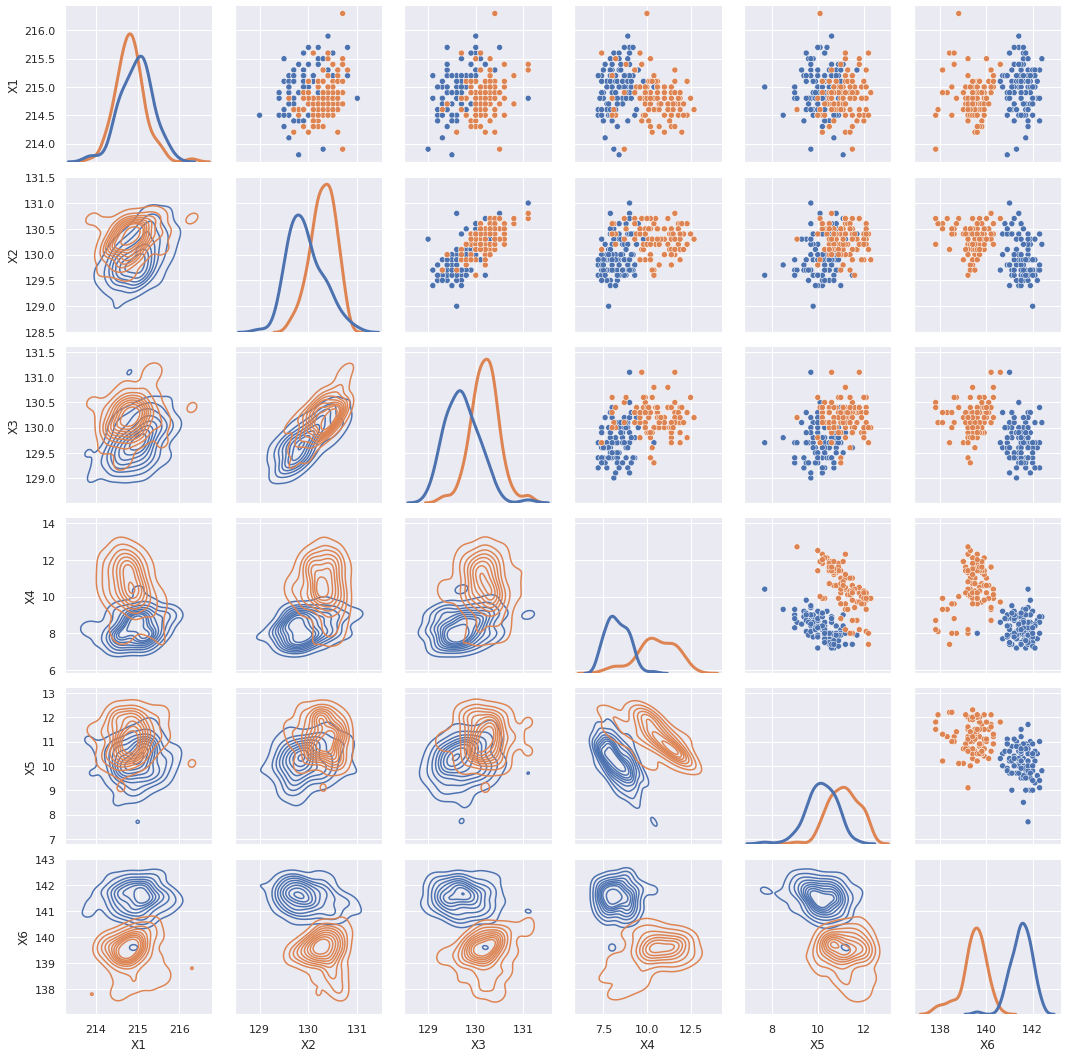

In [ ]:
g = sns.PairGrid(df,hue='Tipo')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)

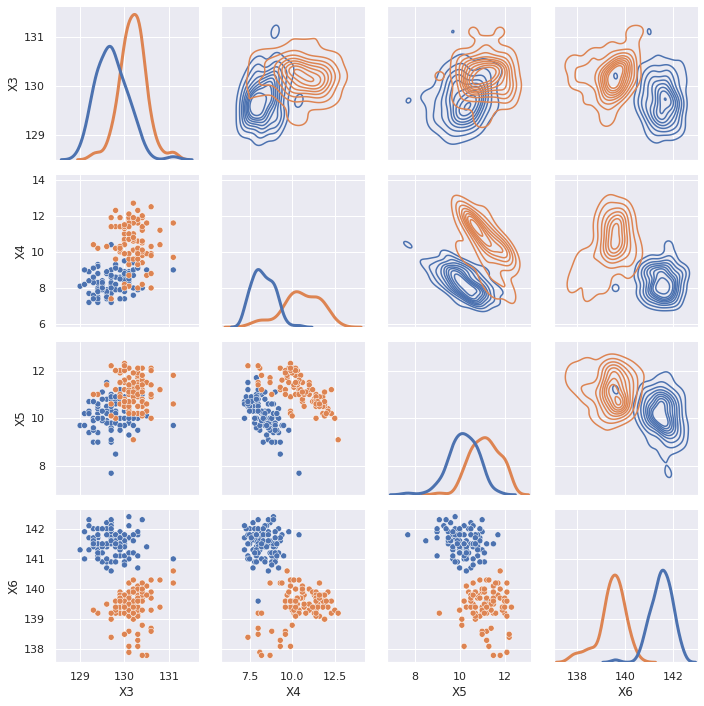

In [ ]:
sub_df=df.iloc[:,2:]
g = sns.PairGrid(sub_df,hue='Tipo')
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3,legend=True)

## Caras de Chernoff

In [ ]:
#En la función original se consideran 18 variables, en este caso solo consideramos 6
def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', linewidth=2)
    # e.set_clip_box(ax.bbox)
    # e.set_facecolor([0,0,0])
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    
    # draw nose
    ax.plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = matplotlib.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/pi*arctan(x8*x9), theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p)
    
    # draw eyes
    p = matplotlib.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)
    
    p = matplotlib.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    # draw pupils
    p = matplotlib.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = matplotlib.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    ax.plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    ax.plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')

fig = plt.figure(figsize=(11,11))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,aspect='equal')
    cface(ax, .9, *rand(17))
    ax.axis([-1.2,1.2,-1.2,1.2])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0, wspace=0)
plt.savefig('predicted.png', bbox_inches='tight')

## Curvas de Andrews


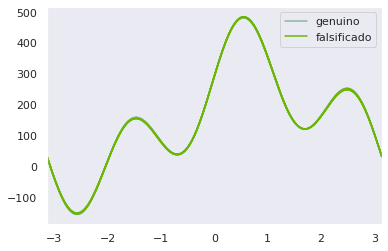

In [ ]:
# Creating Andrews curves 
x = pd.plotting.andrews_curves(df.iloc[96:105,:], 'Tipo') 
  
# ploting the Curve 
x.plot() 
  
# Display 
plt.show()

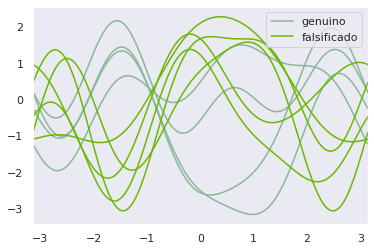

In [ ]:
# Creating Andrews curves 
from sklearn.preprocessing import StandardScaler
df_standard=StandardScaler().fit_transform(df.iloc[:,0:6])
df_standard=pd.DataFrame(df_standard)
df_standard['Tipo'] = np.where(df_standard.index<100, 'genuino', 'falsificado')  
# ploting the Curve 
x = pd.plotting.andrews_curves(df_standard.iloc[96:105,:], 'Tipo')
x.plot() 
  
# Display 
plt.show()

## Coordenadas paralelas

Puede pensarse como una versión simplificada de las curvas de Andrew, en estas gráficas la función mapeada simplemente va tomando los valores en cada variable.

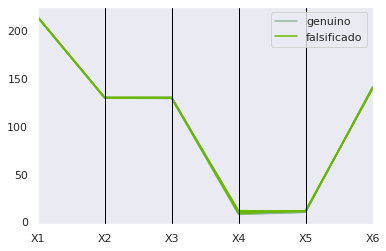

In [ ]:
x = pd.plotting.parallel_coordinates(df.iloc[96:105,:], 'Tipo')
x.plot() 
# Display 
plt.show()

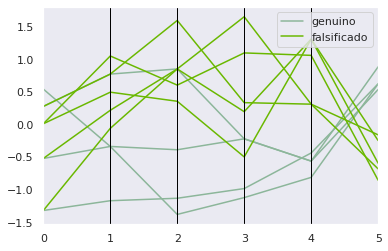

In [ ]:
#Estandarizado
x = pd.plotting.parallel_coordinates(df_standard.iloc[96:105,:], 'Tipo')
x.plot() 
# Display 
plt.show()